In [2]:
import zipfile
import os

# Define paths
raw_data_path = "data/raw/LBSM_All_London.zip"
extract_dir = "data/raw/"

# Unzip the file
with zipfile.ZipFile(raw_data_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Unzipped to: {extract_dir}")

Unzipped to: data/raw/


In [3]:
import pandas as pd

# Define the CSV path
csv_path = os.path.join(extract_dir, "LBSM_All_London.csv")

# Load data (adjust chunksize if memory issues)
try:
    df = pd.read_csv(csv_path)
    print("Data loaded successfully!")
except Exception as e:
    print(f"Error: {e}")

/var/folders/5n/l1swydn11bg6c9v7_60kdfl00000gn/T/ipykernel_9052/1478309273.py:8: DtypeWarning: Columns (22,23,26,28,32,34,36,38,40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


Data loaded successfully!


In [6]:
df.head(5)

,UPRN,SCU_ID,OS_TOPO_TOID,EASTING,NORTHING,LATITUDE,LONGITUDE,OA,LSOA,MSOA,...,AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA,AGG_EPC_CURRENT_ENERGY_RATING_BY_FLOORAREA,AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_COUNT,AGG_EPC_POTENTIAL_ENERGY_RATING_BY_COUNT,AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_FLOORAREA,AGG_EPC_POTENTIAL_ENERGY_RATING_BY_FLOORAREA,AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT,AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT,AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA,AGG_RVEPC_CURRENT_ENERGY_RATING_BY_FLOORAREA
0,95510923,5.030100e+13,osgb1000005894597,532123.0,182028.0,51.521725,-0.096998,E00000010,E01000003,E02000001,...,NaN,NaN,NaN,NaN,NaN,NaN,54.0,E,NaN,NaN
1,100023615843,5.030100e+13,osgb1000005894597,532115.0,182025.0,51.521700,-0.097115,E00000010,E01000003,E02000001,...,NaN,NaN,NaN,NaN,NaN,NaN,54.0,E,NaN,NaN
2,200000071748,5.030100e+13,osgb1000005894760,532193.0,182074.0,51.522122,-0.095973,E00000012,E01000003,E02000001,...,63.0,D,71.0,C,70.0,C,63.0,D,63.0,D
3,200000071808,5.030100e+13,osgb1000005894760,532193.0,182074.0,51.522122,-0.095973,E00000012,E01000003,E02000001,...,63.0,D,71.0,C,70.0,C,63.0,D,63.0,D
4,200000071807,5.030100e+13,osgb1000005894760,532193.0,182074.0,51.522122,-0.095973,E00000012,E01000003,E02000001,...,63.0,D,71.0,C,70.0,C,63.0,D,63.0,D


In [7]:
df.describe()

,UPRN,SCU_ID,EASTING,NORTHING,LATITUDE,LONGITUDE,ESTIMATED_FLOOR_COUNT,ESTIMATE_TOTAL_FLOOR_AREA_ALL,SCU_FOOTPRINT,MEAN_OBJECT_HEIGHT_M,...,AGG_DEC_CURRENT_OPERATIONAL_RATING_BY_COUNT,AGG_DEC_CURRENT_OPERATIONAL_RATING_BY_FLOORAREA,EPC_RATING_COUNT_DOM,EPC_RATING_COUNT_NONDOM,AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT,AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA,AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_COUNT,AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_FLOORAREA,AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT,AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA
count,4.710943e+06,4.199335e+06,4.710943e+06,4.710943e+06,4.710943e+06,4.710943e+06,4.040839e+06,4.077612e+06,4.077612e+06,4.066068e+06,...,17708.000000,17708.000000,4.710943e+06,4.710943e+06,2.530888e+06,2.517743e+06,2.448279e+06,2.434926e+06,4.008957e+06,2.664385e+06
mean,4.869539e+10,5.524026e+13,5.305379e+05,1.802806e+05,5.150630e+01,-1.204738e-01,3.258466e+00,1.742062e+03,5.006609e+02,9.529609e+00,...,104.901288,106.800599,6.009054e+00,1.392012e-01,6.424351e+01,6.417145e+01,7.431736e+01,7.430454e+01,6.217071e+01,6.339902e+01
std,5.709857e+10,2.848321e+12,1.016541e+04,7.928817e+03,7.118639e-02,1.465662e-01,2.740113e+00,1.351462e+04,4.799278e+03,7.243100e+00,...,44.893911,44.281151,1.882490e+01,9.878525e-01,1.391911e+01,1.389497e+01,9.917972e+00,9.966806e+00,1.196736e+01,1.428779e+01
min,5.000001e+06,5.030100e+13,5.035990e+05,1.559100e+05,5.128719e+01,-5.098838e-01,0.000000e+00,0.000000e+00,1.350000e+00,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000e+00,-1.039000e+03,-1.039000e+03,-3.090000e+02,-3.090000e+02,-6.490000e+02,-1.039000e+03
25%,2.020345e+08,5.270110e+13,5.243550e+05,1.751410e+05,5.146018e+01,-2.098480e-01,2.000000e+00,1.050000e+02,6.163000e+01,5.920000e+00,...,76.000000,80.000000,0.000000e+00,0.000000e+00,5.800000e+01,5.800000e+01,7.100000e+01,7.100000e+01,5.600000e+01,5.700000e+01
50%,1.007027e+10,5.510120e+13,5.308160e+05,1.808950e+05,5.151243e+01,-1.165239e-01,2.000000e+00,1.790000e+02,9.412000e+01,7.240000e+00,...,95.000000,98.000000,1.000000e+00,0.000000e+00,6.600000e+01,6.600000e+01,7.600000e+01,7.600000e+01,6.300000e+01,6.500000e+01
75%,1.000215e+11,5.780105e+13,5.369910e+05,1.858690e+05,5.155623e+01,-2.714640e-02,4.000000e+00,8.699300e+02,3.208500e+02,1.081000e+01,...,121.000000,121.000000,3.000000e+00,0.000000e+00,7.200000e+01,7.200000e+01,8.000000e+01,8.000000e+01,6.900000e+01,7.200000e+01
max,2.000044e+11,5.990126e+13,5.616086e+05,2.008590e+05,5.169117e+01,3.290815e-01,1.870000e+02,1.211826e+06,5.385512e+05,5.188300e+02,...,1606.000000,1606.000000,3.900000e+02,6.400000e+01,2.240000e+02,2.230000e+02,2.270000e+02,2.260000e+02,2.240000e+02,2.230000e+02


In [8]:
df.isnull().sum()
(df.isnull().sum() / len(df)) * 100



UPRN                                                     0.000000
SCU_ID                                                  10.859991
OS_TOPO_TOID                                             0.000000
EASTING                                                  0.000000
NORTHING                                                 0.000000
LATITUDE                                                 0.000000
LONGITUDE                                                0.000000
OA                                                       0.096753
LSOA                                                     0.096753
MSOA                                                     0.096753
OAC                                                      0.096753
WARD_CODE                                                0.096753
WARD                                                     0.096753
ADMINISTRATIVE_AREA                                      0.000000
ESTIMATED_FLOOR_COUNT                                   14.224413
ESTIMATE_T

In [10]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces


In [7]:
df = df.drop_duplicates()
high_missing_cols = [
    'BASEMENT_FLOOR',  # 93.1% missing
    'AGG_DEC_CURRENT_OPERATIONAL_RATING_BY_COUNT',  # 99.6% missing
    'AGG_DEC_CURRENT_OPERATIONAL_RATING_BAND_BY_COUNT',
    'AGG_DEC_CURRENT_OPERATIONAL_RATING_BY_FLOORAREA',
    'AGG_DEC_CURRENT_OPERATIONAL_RATING_BAND_BY_FLOORAREA',
    'DOMINANT_ND_ACTIVITY_BY_C2_FS',  # 85.6% missing
    'DOMINANT_ND_ACTIVITY_BY_C2_COUNT'  # 84.7% missing
]
df = df.drop(columns=high_missing_cols )



In [8]:
if df is None:
    print("DataFrame is not loaded properly!")
else:
    print("DataFrame loaded successfully!")


DataFrame loaded successfully!


In [9]:
df.head(5)  # View the first few rows
df.info()  # View info about the DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4710943 entries, 0 to 4710942
Data columns (total 36 columns):
 #   Column                                            Dtype  
---  ------                                            -----  
 0   UPRN                                              int64  
 1   SCU_ID                                            float64
 2   OS_TOPO_TOID                                      object 
 3   EASTING                                           float64
 4   NORTHING                                          float64
 5   LATITUDE                                          float64
 6   LONGITUDE                                         float64
 7   OA                                                object 
 8   LSOA                                              object 
 9   MSOA                                              object 
 10  OAC                                               object 
 11  WARD_CODE                                         object 
 12  

In [10]:
numeric_cols = ['ESTIMATED_FLOOR_COUNT', 'ESTIMATE_TOTAL_FLOOR_AREA_ALL', 'MEAN_OBJECT_HEIGHT_M']
for col in numeric_cols:
    if col in df.columns:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
    else:
        print(f"Column {col} not found in the DataFrame")

# For EPC data: Drop missing rows (if critical) OR impute
df = df.dropna(subset=['AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT'])

In [11]:
print(df.columns.tolist())
# Drop negligible missing rows for OA/LSOA/MSOA

df = df.drop(columns=['SCU_ID', 'COUNT_D_UPRNS', 'COUNT_ND_UPRNS'] )

['UPRN', 'SCU_ID', 'OS_TOPO_TOID', 'EASTING', 'NORTHING', 'LATITUDE', 'LONGITUDE', 'OA', 'LSOA', 'MSOA', 'OAC', 'WARD_CODE', 'WARD', 'ADMINISTRATIVE_AREA', 'ESTIMATED_FLOOR_COUNT', 'ESTIMATE_TOTAL_FLOOR_AREA_ALL', 'SCU_FOOTPRINT', 'MEAN_OBJECT_HEIGHT_M', 'COUNT_D_UPRNS', 'COUNT_ND_UPRNS', 'MIX_CLASS', 'DEC_COUNT', 'EPC_RATING_COUNT_DOM', 'EPC_RATING_COUNT_NONDOM', 'AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT', 'AGG_EPC_CURRENT_ENERGY_RATING_BY_COUNT', 'AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA', 'AGG_EPC_CURRENT_ENERGY_RATING_BY_FLOORAREA', 'AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_COUNT', 'AGG_EPC_POTENTIAL_ENERGY_RATING_BY_COUNT', 'AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_FLOORAREA', 'AGG_EPC_POTENTIAL_ENERGY_RATING_BY_FLOORAREA', 'AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT', 'AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT', 'AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA', 'AGG_RVEPC_CURRENT_ENERGY_RATING_BY_FLOORAREA']


In [12]:
df = df.dropna(subset=['OA', 'LSOA', 'MSOA'])

In [13]:
# Check remaining missing values
missing_percent = (df.isnull().sum() / len(df)) * 100
print("Remaining Missing Values (%):")
print(missing_percent[missing_percent > 0])

# Save cleaned data


Remaining Missing Values (%):
MIX_CLASS                                           3.111409
AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA      0.519438
AGG_EPC_CURRENT_ENERGY_RATING_BY_FLOORAREA          0.519438
AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_COUNT        3.259159
AGG_EPC_POTENTIAL_ENERGY_RATING_BY_COUNT            3.259159
AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_FLOORAREA    3.786816
AGG_EPC_POTENTIAL_ENERGY_RATING_BY_FLOORAREA        3.786816
AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA    0.504935
AGG_RVEPC_CURRENT_ENERGY_RATING_BY_FLOORAREA        0.504935
dtype: float64


In [14]:
cols_to_dropna = [
    'MIX_CLASS',
    'AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_COUNT',
    'AGG_EPC_POTENTIAL_ENERGY_RATING_BY_COUNT',
    'AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_FLOORAREA',
    'AGG_EPC_POTENTIAL_ENERGY_RATING_BY_FLOORAREA'
]
df = df.dropna(subset=cols_to_dropna )

In [15]:
cols_to_dropna_tiny = [
    'AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA',
    'AGG_EPC_CURRENT_ENERGY_RATING_BY_FLOORAREA',
    'AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA',
    'AGG_RVEPC_CURRENT_ENERGY_RATING_BY_FLOORAREA'
]
df = df.dropna(subset=cols_to_dropna_tiny)

In [16]:
missing_percent = (df.isnull().sum() / len(df)) * 100
print("Remaining Missing Values (%):")
print(missing_percent[missing_percent > 0])

Remaining Missing Values (%):
Series([], dtype: float64)


In [17]:
df = df.reset_index(drop=True)

In [18]:
print(df.columns.tolist())
     

['UPRN', 'OS_TOPO_TOID', 'EASTING', 'NORTHING', 'LATITUDE', 'LONGITUDE', 'OA', 'LSOA', 'MSOA', 'OAC', 'WARD_CODE', 'WARD', 'ADMINISTRATIVE_AREA', 'ESTIMATED_FLOOR_COUNT', 'ESTIMATE_TOTAL_FLOOR_AREA_ALL', 'SCU_FOOTPRINT', 'MEAN_OBJECT_HEIGHT_M', 'MIX_CLASS', 'DEC_COUNT', 'EPC_RATING_COUNT_DOM', 'EPC_RATING_COUNT_NONDOM', 'AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT', 'AGG_EPC_CURRENT_ENERGY_RATING_BY_COUNT', 'AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA', 'AGG_EPC_CURRENT_ENERGY_RATING_BY_FLOORAREA', 'AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_COUNT', 'AGG_EPC_POTENTIAL_ENERGY_RATING_BY_COUNT', 'AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_FLOORAREA', 'AGG_EPC_POTENTIAL_ENERGY_RATING_BY_FLOORAREA', 'AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT', 'AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT', 'AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA', 'AGG_RVEPC_CURRENT_ENERGY_RATING_BY_FLOORAREA']


In [19]:
df.columns_to_drop = [
    'OA', 'LSOA', 'MSOA', 'OAC',  # Census codes (not critical for buildings)
    'AGG_DEC_CURRENT_OPERATIONAL_RATING_BY_COUNT', 
    'AGG_DEC_CURRENT_OPERATIONAL_RATING_BAND_BY_COUNT',
    'AGG_DEC_CURRENT_OPERATIONAL_RATING_BY_FLOORAREA',
    'AGG_DEC_CURRENT_OPERATIONAL_RATING_BAND_BY_FLOORAREA',
    'DEC_COUNT'  # DEC data (less critical)
]


/var/folders/5n/l1swydn11bg6c9v7_60kdfl00000gn/T/ipykernel_9427/198224648.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.columns_to_drop = [


In [20]:
df.dtypes



UPRN                                                  int64
OS_TOPO_TOID                                         object
EASTING                                             float64
NORTHING                                            float64
LATITUDE                                            float64
LONGITUDE                                           float64
OA                                                   object
LSOA                                                 object
MSOA                                                 object
OAC                                                  object
WARD_CODE                                            object
WARD                                                 object
ADMINISTRATIVE_AREA                                  object
ESTIMATED_FLOOR_COUNT                               float64
ESTIMATE_TOTAL_FLOOR_AREA_ALL                       float64
SCU_FOOTPRINT                                       float64
MEAN_OBJECT_HEIGHT_M                    

In [21]:
# List of columns that should be numeric
columns_to_convert = [
    'AGG_EPC_CURRENT_ENERGY_RATING_BY_COUNT', 
    'AGG_EPC_CURRENT_ENERGY_RATING_BY_FLOORAREA',
    'AGG_EPC_POTENTIAL_ENERGY_RATING_BY_COUNT', 
    'AGG_EPC_POTENTIAL_ENERGY_RATING_BY_FLOORAREA',
    'AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT',
    'AGG_RVEPC_CURRENT_ENERGY_RATING_BY_FLOORAREA'
]

# Convert to numeric, forcing errors to NaN
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')


In [22]:
# Calculate the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Set the threshold for missing values, e.g., 95%
threshold = 95

# Get columns to drop based on the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold].index

# Drop those columns
df = df.drop(columns=columns_to_drop)

# Check the remaining columns
print("Remaining columns after dropping high missing columns:")
print(df.columns)


Remaining columns after dropping high missing columns:
Index(['UPRN', 'OS_TOPO_TOID', 'EASTING', 'NORTHING', 'LATITUDE', 'LONGITUDE',
       'OA', 'LSOA', 'MSOA', 'OAC', 'WARD_CODE', 'WARD', 'ADMINISTRATIVE_AREA',
       'ESTIMATED_FLOOR_COUNT', 'ESTIMATE_TOTAL_FLOOR_AREA_ALL',
       'SCU_FOOTPRINT', 'MEAN_OBJECT_HEIGHT_M', 'MIX_CLASS', 'DEC_COUNT',
       'EPC_RATING_COUNT_DOM', 'EPC_RATING_COUNT_NONDOM',
       'AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT',
       'AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA',
       'AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_COUNT',
       'AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_FLOORAREA',
       'AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT',
       'AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA'],
      dtype='object')


In [23]:
# Check missing values
print(df.isnull().sum())


UPRN                                                0
OS_TOPO_TOID                                        0
EASTING                                             0
NORTHING                                            0
LATITUDE                                            0
LONGITUDE                                           0
OA                                                  0
LSOA                                                0
MSOA                                                0
OAC                                                 0
WARD_CODE                                           0
WARD                                                0
ADMINISTRATIVE_AREA                                 0
ESTIMATED_FLOOR_COUNT                               0
ESTIMATE_TOTAL_FLOOR_AREA_ALL                       0
SCU_FOOTPRINT                                       0
MEAN_OBJECT_HEIGHT_M                                0
MIX_CLASS                                           0
DEC_COUNT                   

In [24]:
df.to_parquet("data/processed/lbsm_clean.parquet")

In [25]:
print(df.columns)


Index(['UPRN', 'OS_TOPO_TOID', 'EASTING', 'NORTHING', 'LATITUDE', 'LONGITUDE',
       'OA', 'LSOA', 'MSOA', 'OAC', 'WARD_CODE', 'WARD', 'ADMINISTRATIVE_AREA',
       'ESTIMATED_FLOOR_COUNT', 'ESTIMATE_TOTAL_FLOOR_AREA_ALL',
       'SCU_FOOTPRINT', 'MEAN_OBJECT_HEIGHT_M', 'MIX_CLASS', 'DEC_COUNT',
       'EPC_RATING_COUNT_DOM', 'EPC_RATING_COUNT_NONDOM',
       'AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT',
       'AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA',
       'AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_COUNT',
       'AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_FLOORAREA',
       'AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT',
       'AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA'],
      dtype='object')


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2360477 entries, 0 to 2360476
Data columns (total 27 columns):
 #   Column                                            Dtype  
---  ------                                            -----  
 0   UPRN                                              int64  
 1   OS_TOPO_TOID                                      object 
 2   EASTING                                           float64
 3   NORTHING                                          float64
 4   LATITUDE                                          float64
 5   LONGITUDE                                         float64
 6   OA                                                object 
 7   LSOA                                              object 
 8   MSOA                                              object 
 9   OAC                                               object 
 10  WARD_CODE                                         object 
 11  WARD                                         

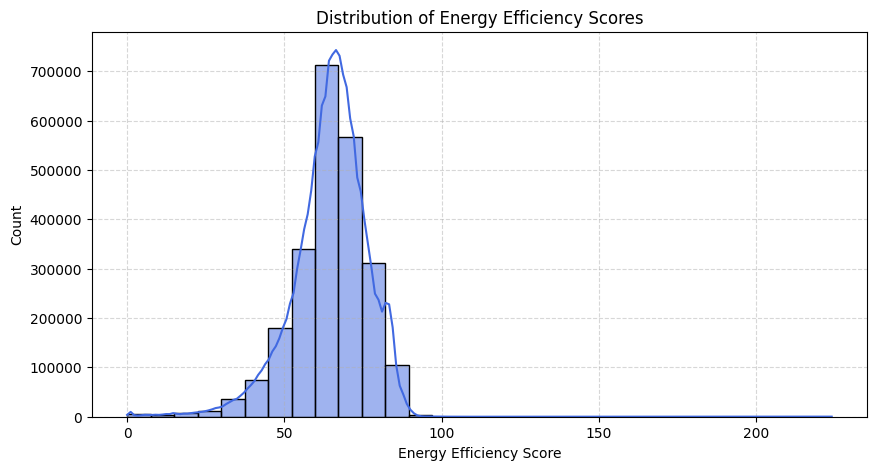

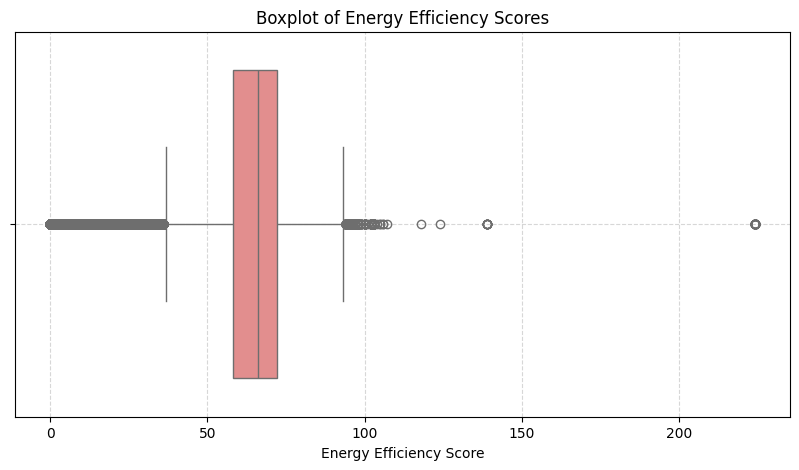

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_parquet("data/processed/lbsm_clean.parquet")

# Display dataset overview
print("Dataset Overview:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Selecting relevant column and filtering out negative values
efficiency_col = "AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT"
df_filtered = df[df[efficiency_col] >= 0]  # Remove negative values

# Check if filtering significantly reduces the dataset
print(f"\nOriginal row count: {len(df)}, Filtered row count: {len(df_filtered)}")

# Distribution of Energy Efficiency Scores
plt.figure(figsize=(10, 5))
sns.histplot(df_filtered[efficiency_col], bins=30, kde=True, color="royalblue")
plt.title("Distribution of Energy Efficiency Scores")
plt.xlabel("Energy Efficiency Score")
plt.ylabel("Count")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Boxplot to check for outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_filtered[efficiency_col], color="lightcoral")
plt.title("Boxplot of Energy Efficiency Scores")
plt.xlabel("Energy Efficiency Score")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


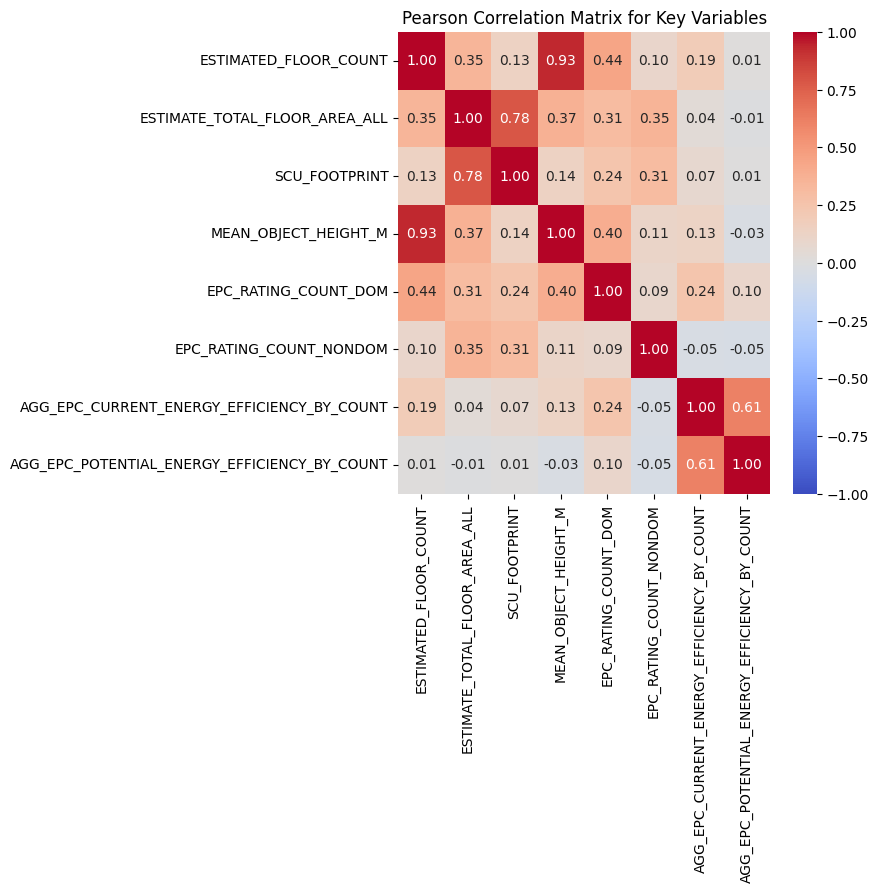

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your cleaned dataset
df = pd.read_parquet("data/processed/lbsm_clean.parquet")

# Select relevant columns
cols = [
    'ESTIMATED_FLOOR_COUNT',
    'ESTIMATE_TOTAL_FLOOR_AREA_ALL',
    'SCU_FOOTPRINT',
    'MEAN_OBJECT_HEIGHT_M',
    'EPC_RATING_COUNT_DOM',
    'EPC_RATING_COUNT_NONDOM',
    'AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT',
    'AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_COUNT'
]

# Compute Pearson correlation matrix
corr_matrix = df[cols].corr(method='pearson')

# Visualize with a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.title("Pearson Correlation Matrix for Key Variables")
plt.show()

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_parquet("data/processed/lbsm_clean.parquet")

# Define independent variables (features) and dependent variable (target)
independent_vars = [
    'ESTIMATED_FLOOR_COUNT',
    'ESTIMATE_TOTAL_FLOOR_AREA_ALL',
    'SCU_FOOTPRINT',
    'MEAN_OBJECT_HEIGHT_M',
    'EPC_RATING_COUNT_DOM',
    'EPC_RATING_COUNT_NONDOM'
]
dependent_var = 'AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT'

# Compute correlations
correlations = {}
for var in independent_vars:
    corr = df[var].corr(df[dependent_var], method='pearson')  # or 'spearman'
    correlations[var] = corr

# Convert to DataFrame for easy viewing
corr_df = pd.DataFrame(list(correlations.items()), columns=['Variable', 'Correlation'])
corr_df = corr_df.sort_values(by='Correlation', ascending=False)
print(corr_df)

                        Variable  Correlation
4           EPC_RATING_COUNT_DOM     0.244919
0          ESTIMATED_FLOOR_COUNT     0.187592
3           MEAN_OBJECT_HEIGHT_M     0.126278
2                  SCU_FOOTPRINT     0.073986
1  ESTIMATE_TOTAL_FLOOR_AREA_ALL     0.039058
5        EPC_RATING_COUNT_NONDOM    -0.045248


In [29]:
import pandas as pd

# Example DataFrame with your key columns
data = {
    'Building_Age': [30, 50, 20, 80, 40],
    'EPC_Efficiency': [60, 40, 70, 30, 50],
    'Floor_Area': [1000, 1500, 800, 2000, 1200]
}
df = pd.DataFrame(data)

# Calculate Pearson correlations
corr_matrix = df.corr(method='pearson')
print(corr_matrix)

                Building_Age  EPC_Efficiency  Floor_Area
Building_Age        1.000000       -0.961524    0.995541
EPC_Efficiency     -0.961524        1.000000   -0.977590
Floor_Area          0.995541       -0.977590    1.000000


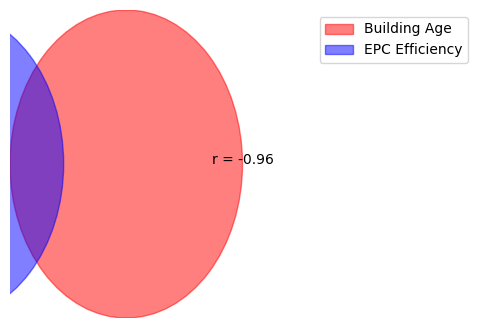

In [30]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def plot_correlation_circles(var1, var2, correlation, ax):
    # Circle radii (adjust based on variable importance)
    radius_var1 = 0.5
    radius_var2 = 0.5
    
    # Positions
    x1, y1 = 0.5, 0.5
    x2 = x1 + correlation * 0.8  # Shift based on correlation
    
    # Draw circles
    circle1 = Circle((x1, y1), radius_var1, color='red', alpha=0.5, label=var1)
    circle2 = Circle((x2, y1), radius_var2, color='blue', alpha=0.5, label=var2)
    
    ax.add_patch(circle1)
    ax.add_patch(circle2)
    
    # Annotate correlation value
    ax.text(x1 + 0.5, y1, f'r = {correlation:.2f}', ha='center')
    
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 1)
    ax.axis('off')
    ax.legend()

# Example: Plot correlation between 'Building_Age' and 'EPC_Efficiency'
corr_value = corr_matrix.loc['Building_Age', 'EPC_Efficiency']
fig, ax = plt.subplots(figsize=(6, 4))
plot_correlation_circles('Building Age', 'EPC Efficiency', corr_value, ax)
plt.show()

In [33]:
# correlation calculation
# corr_df = pd.DataFrame(columns=[r,p])

In [34]:
target_column = "AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT"

In [35]:
import pandas as pd
from scipy import stats

# Initialize DataFrame to store results
corr_df = pd.DataFrame(columns=['r', 'p'])

# Loop through columns
for col in df.columns:
    # Skip non-numeric and target column
    if pd.api.types.is_numeric_dtype(df[col]) and col != target_column:
        r, p = stats.pearsonr(df[target_column], df[col])
        corr_df.loc[col] = [round(r, 3), round(p, 3)]

# Sort by absolute correlation strength
corr_df['abs_r'] = corr_df['r'].abs()
corr_df = corr_df.sort_values('abs_r', ascending=False).drop(columns='abs_r')

print(corr_df)

KeyError: 'AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT'

In [36]:
df.head(5)

,Building_Age,EPC_Efficiency,Floor_Area
0,30,60,1000
1,50,40,1500
2,20,70,800
3,80,30,2000
4,40,50,1200


NameError: name 'df' is not defined